In [1]:
#for exploring dataframe
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

#for animated graphs
import plotly.express as px
import plotly.graph_objects as go

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.linear_model import LogisticRegression as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Yield,Watering,Pesticide
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,NaN,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."


In [4]:
df.shape

(2200, 11)

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Yield,Watering,Pesticide
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2199 non-null   float64
 2   K            2197 non-null   float64
 3   temperature  2170 non-null   float64
 4   humidity     2168 non-null   float64
 5   ph           2170 non-null   float64
 6   rainfall     2174 non-null   float64
 7   label        2200 non-null   object 
 8   Yield        2200 non-null   object 
 9   Watering     2200 non-null   object 
 10  Pesticide    2200 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 189.2+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2199.000000,2197.000000,2170.000000,2168.000000,2170.000000,2174.000000
mean,50.558182,53.334243,48.179335,25.626523,71.534974,6.471553,103.655826
std,36.915772,32.968933,50.673278,5.065632,22.259177,0.773362,54.981844
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.770458,60.231681,5.972749,64.592808
50%,37.000000,51.000000,32.000000,25.598693,80.524876,6.425045,95.085968
75%,84.250000,68.000000,49.000000,28.561076,90.008429,6.924379,124.408005
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot: >

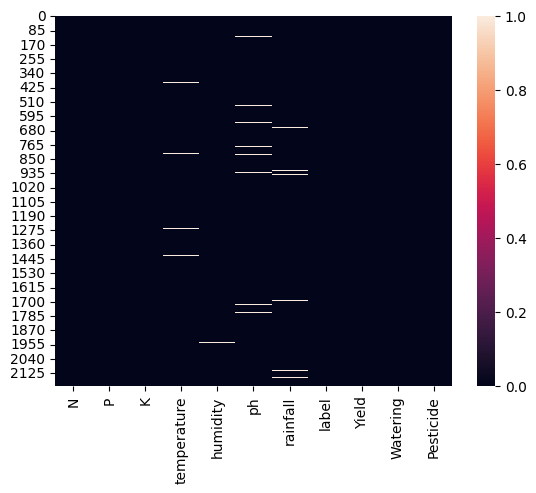

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isna().sum()

N               0
P               1
K               3
temperature    30
humidity       32
ph             30
rainfall       26
label           0
Yield           0
Watering        0
Pesticide       0
dtype: int64

## Data Cleaning

In [10]:
df.N = df.N.fillna(value = 0)
df.P = df.P.fillna(value = 0)
df.K = df.K.fillna(value = 0)

In [11]:
df.temperature = df.temperature.fillna(value = df.temperature.mean())
df.humidity = df.humidity.fillna(value = df.humidity.mean())
df.ph = df.ph.fillna(value = df.ph.mean())
df.rainfall = df.rainfall.fillna(value = df.rainfall.mean())

In [12]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
Yield          0
Watering       0
Pesticide      0
dtype: int64

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Yield,Watering,Pesticide
0,90,42.0,43.0,20.879744,82.002744,6.502985,203.983200,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
1,85,58.0,41.0,22.000940,80.319644,7.038096,226.655537,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,22-25 quintals per acre,10 mm per day,"Lambda-cyhalothrin, malathion and zeta-cyperme..."
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,103.655826,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,4 to 7 quintals per hectare,1200 to 1800 mm per year,"White stem borer, coffee berry borer, Shoot ho..."


In [14]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Exploratory Data Analysis

### Statistical Study

In [15]:
@interact
def summary(crops= list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print("____________________________________________________")
    print("Statistics for Nitrogen")
    print('Minimum Nitrogen Required: ',x['N'].min())
    print('Average Nitrogen Required: ',x['N'].mean())
    print('Maximum Nitrogen Required: ',x['N'].max())
    
    
    print("____________________________________________________")
    print("Statistics for Phosphrus")
    print('Minimum Phosphorus Required: ',x['P'].min())
    print('Average Phosphorus Required: ',x['P'].mean())
    print('Maximum Phosphorus Required: ',x['P'].max())

    print("____________________________________________________")
    print("Statistics for Pottasium")
    print('Minimum Pottasium Required: ',x['K'].min())
    print('Average Pottasium Required: ',x['K'].mean())
    print('Maximum Pottaisum Required: ',x['K'].max())

    print("____________________________________________________")
    print("Statistics for Temperature")
    print('Minimum Temperature Required: {:.2f}'.format(x['temperature'].min()))
    print('Average Temperature Required: {:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature Required: {:.2f}'.format(x['temperature'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Humidity")
    print('Minimum Humidity Required: {:.2f}'.format(x['humidity'].min()))
    print('Average Humidity Required: {:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity Required: {:.2f}'.format(x['humidity'].max()))
    
    print("____________________________________________________")
    print("Statistics for ph")
    print('Minimum ph Required: {:.2f}'.format(x['ph'].min()))
    print('Average ph Required: {:.2f}'.format(x['ph'].mean()))
    print('Maximum ph Required: {:.2f}'.format(x['ph'].max()))
    
    
    print("____________________________________________________")
    print("Statistics for Rainfall")
    print('Minimum Rainfall Required: {:.2f} '.format(x['rainfall'].min()))
    print('Average Rainfall Required: {:.2f}'.format(x['rainfall'].mean()))
    print('Maximum Rainfall Required: {:.2f}'.format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [16]:
@interact
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for: {:.2f}".format(df[condition].mean()))
    print("-----------------------------------------------------")
    print("Rice: {0:.2f}".format(df[(df['label']=='rice')][condition].mean()))
    print("Black Grams: {0:.2f}".format(df[(df['label']=='blackgram')][condition].mean()))
    print("Banana: {0:.2f}".format(df[(df['label']=='banana')][condition].mean()))
    print("Jute: {0:.2f}".format(df[(df['label']=='jute')][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [17]:
@interact 
def compare(condition=['N','P','K','temperature','ph','humidity','rainfall']):
    print(f"Crops which require greater {condition} than than average",'\n')
    print(df[df[condition] > df[condition].mean()]['label'].unique())
    print("------------------------------------------------")
    print(f"Crops which require lesser {condition} than than average",'\n')
    print(df[df[condition] <= df[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [18]:
print("Some interesting patterns")
print("----------------------------")
print("Crops which require very high ratio of Nitrogen Content in soil: ",df[df['N']>120]['label'].unique())
print("Crops which require very high ratio of Phosphorus Content in soil: ",df[df['P']>100]['label'].unique())
print("Crops which require very high ratio of Pottasium Content in soil: ",df[df['K']>200]['label'].unique())
print("Crops which require very high Rainfall: ",df[df['rainfall']>200]['label'].unique())
print("Crops which require very Low Temperature: ",df[df['temperature']<10]['label'].unique())
print("Crops which require very High Temperature: ",df[df['temperature']>40]['label'].unique())
print("Crops which require very Low Humidity: ",df[df['humidity']<20]['label'].unique())
print("Crops which require very High pH value ",df[df['ph']>9]['label'].unique())
print("Crops which require very Low pH value: ",df[df['ph']<4]['label'].unique())

Some interesting patterns
----------------------------
Crops which require very high ratio of Nitrogen Content in soil:  ['cotton']
Crops which require very high ratio of Phosphorus Content in soil:  ['grapes' 'apple']
Crops which require very high ratio of Pottasium Content in soil:  ['grapes' 'apple']
Crops which require very high Rainfall:  ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature:  ['grapes']
Crops which require very High Temperature:  ['grapes' 'papaya']
Crops which require very Low Humidity:  ['chickpea' 'kidneybeans']
Crops which require very High pH value  ['mothbeans']
Crops which require very Low pH value:  ['mothbeans']


In [19]:
print("Summer Crops")
print(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())

print("---------------------------------------------------")
print("Winter Crops")
print(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())

print("---------------------------------------------------")
print("Rainy Crops")
print(df[(df['rainfall']>200) & (df['humidity']>50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------
Winter Crops
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'pomegranate'
 'grapes' 'orange']
---------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Visualisation

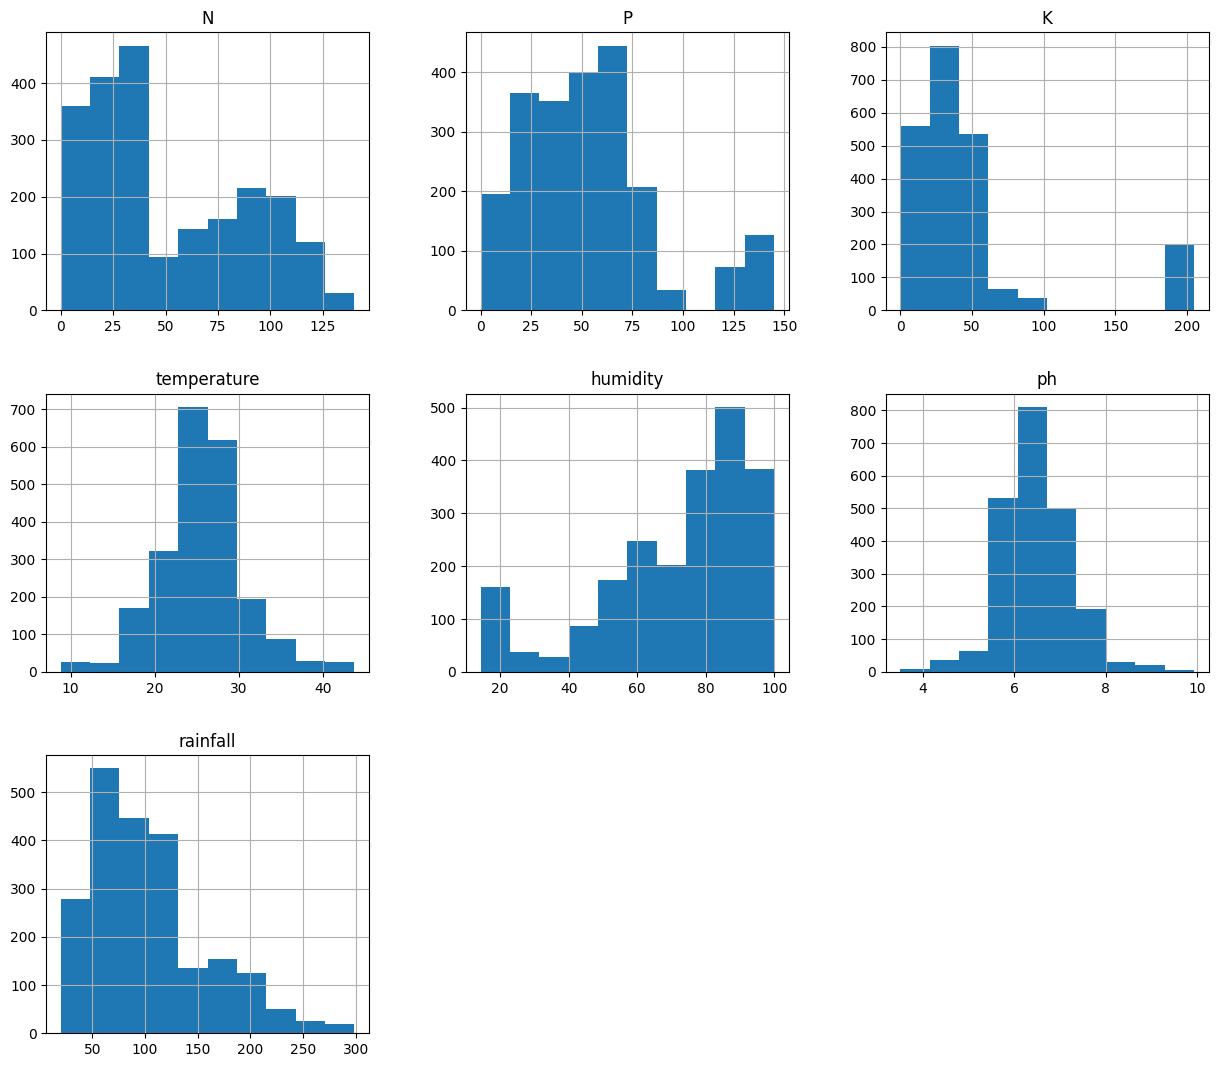

In [20]:
df.hist(bins = 10 , figsize = (15,13))
plt.show()

<AxesSubplot: >

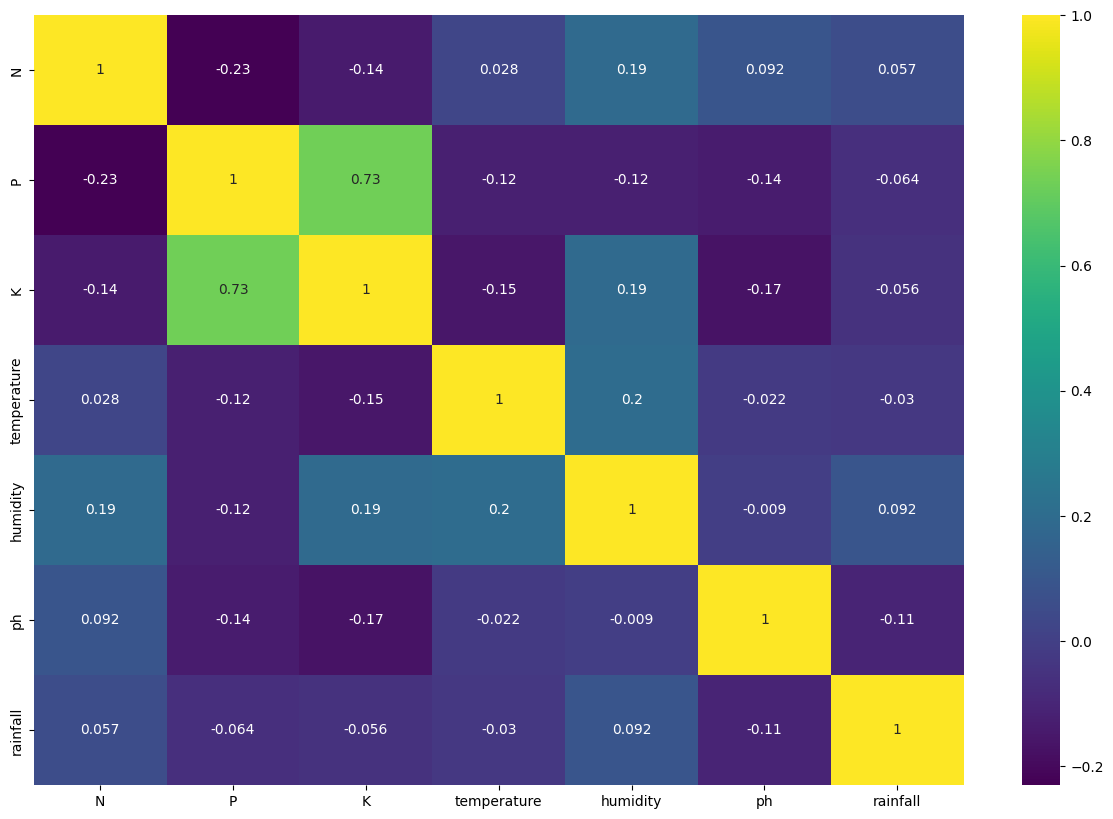

In [21]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

<AxesSubplot: xlabel='label', ylabel='count'>

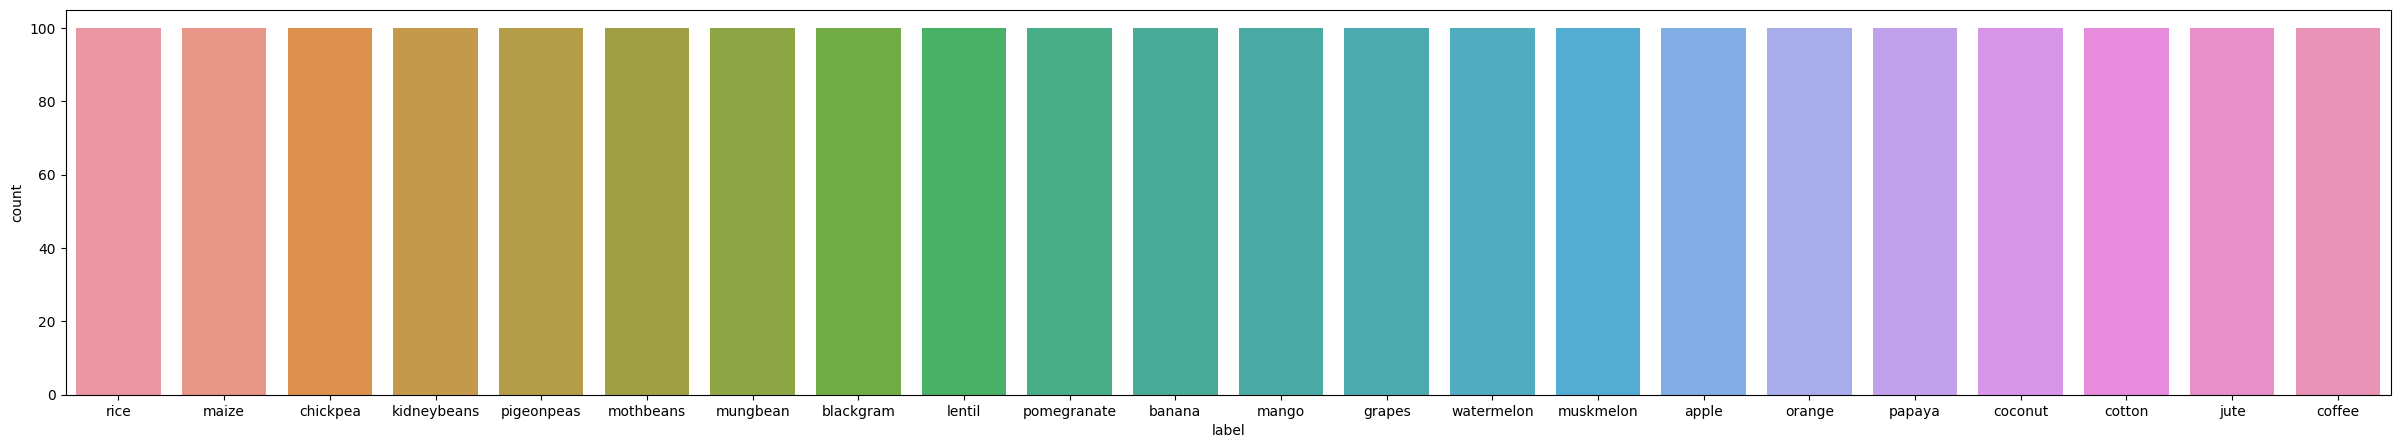

In [22]:
plt.figure(figsize = (30 , 5))
sns.countplot(data = df , x = 'label' )

<AxesSubplot: xlabel='label', ylabel='N'>

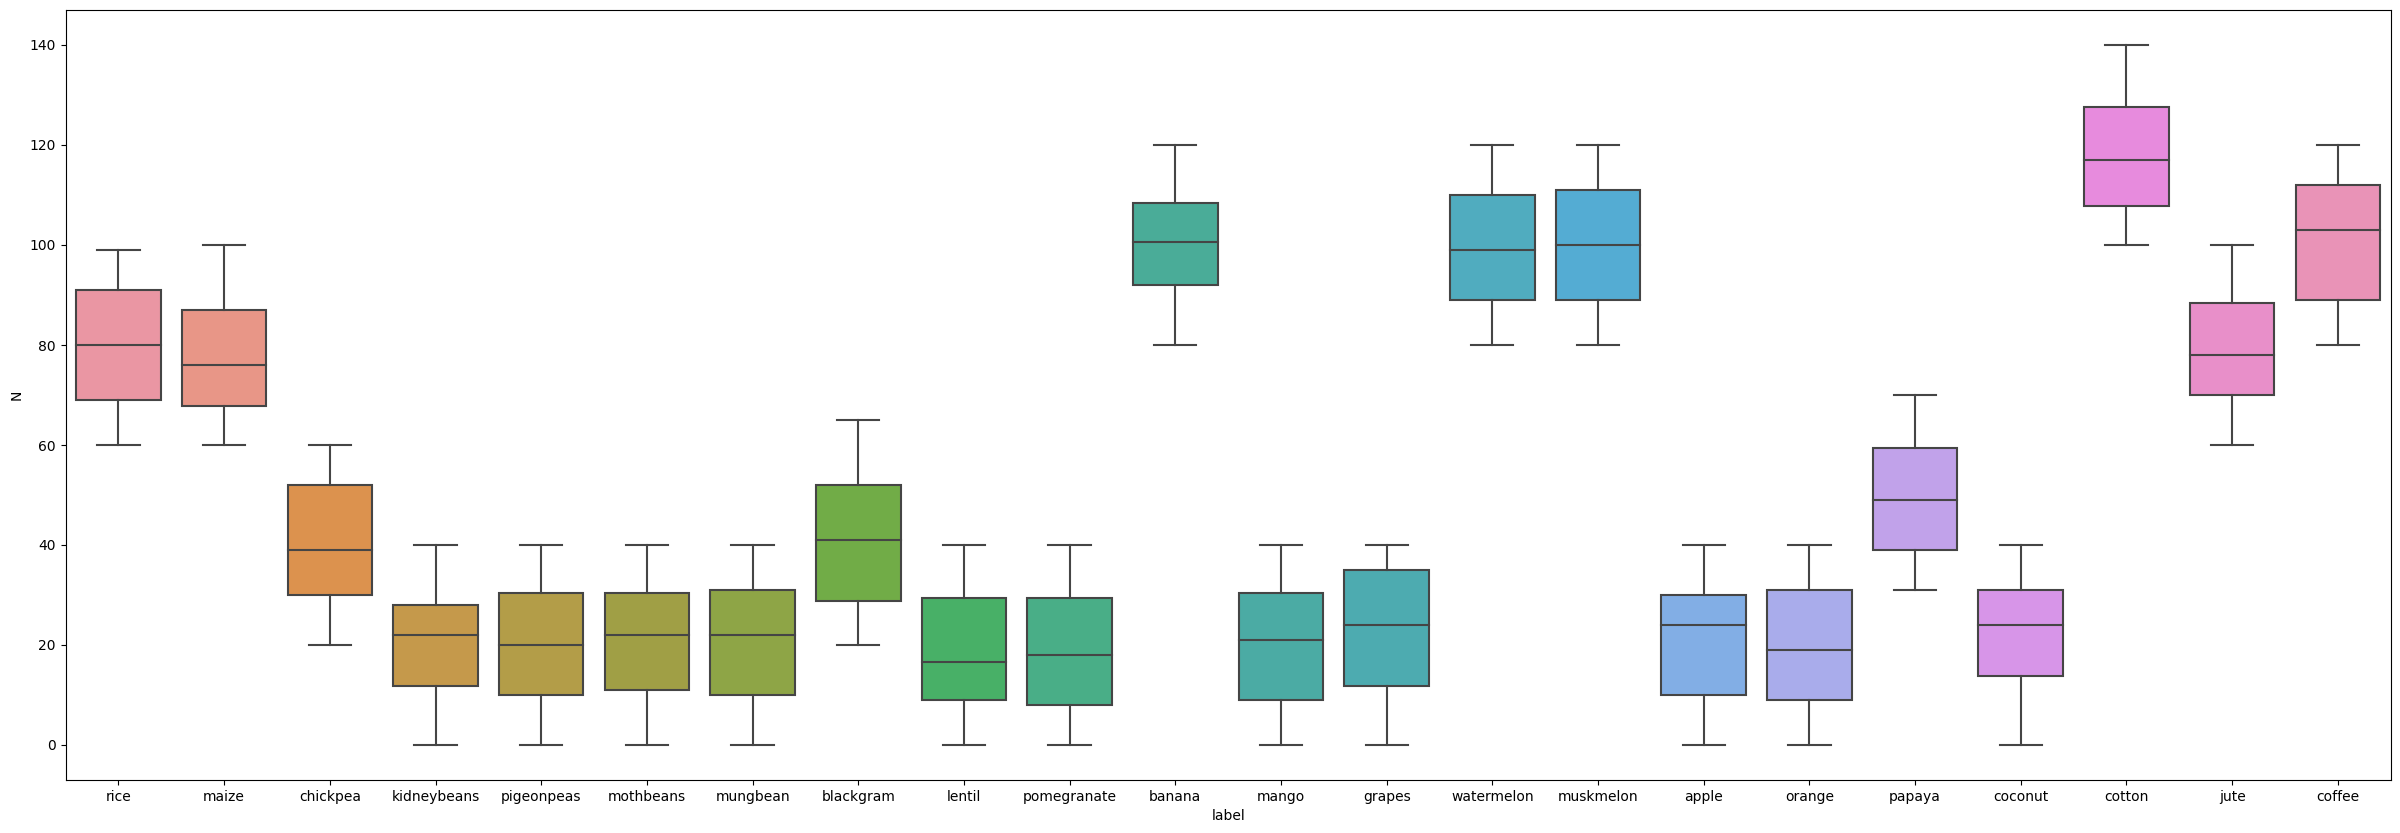

In [23]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'N')

<AxesSubplot: xlabel='label', ylabel='P'>

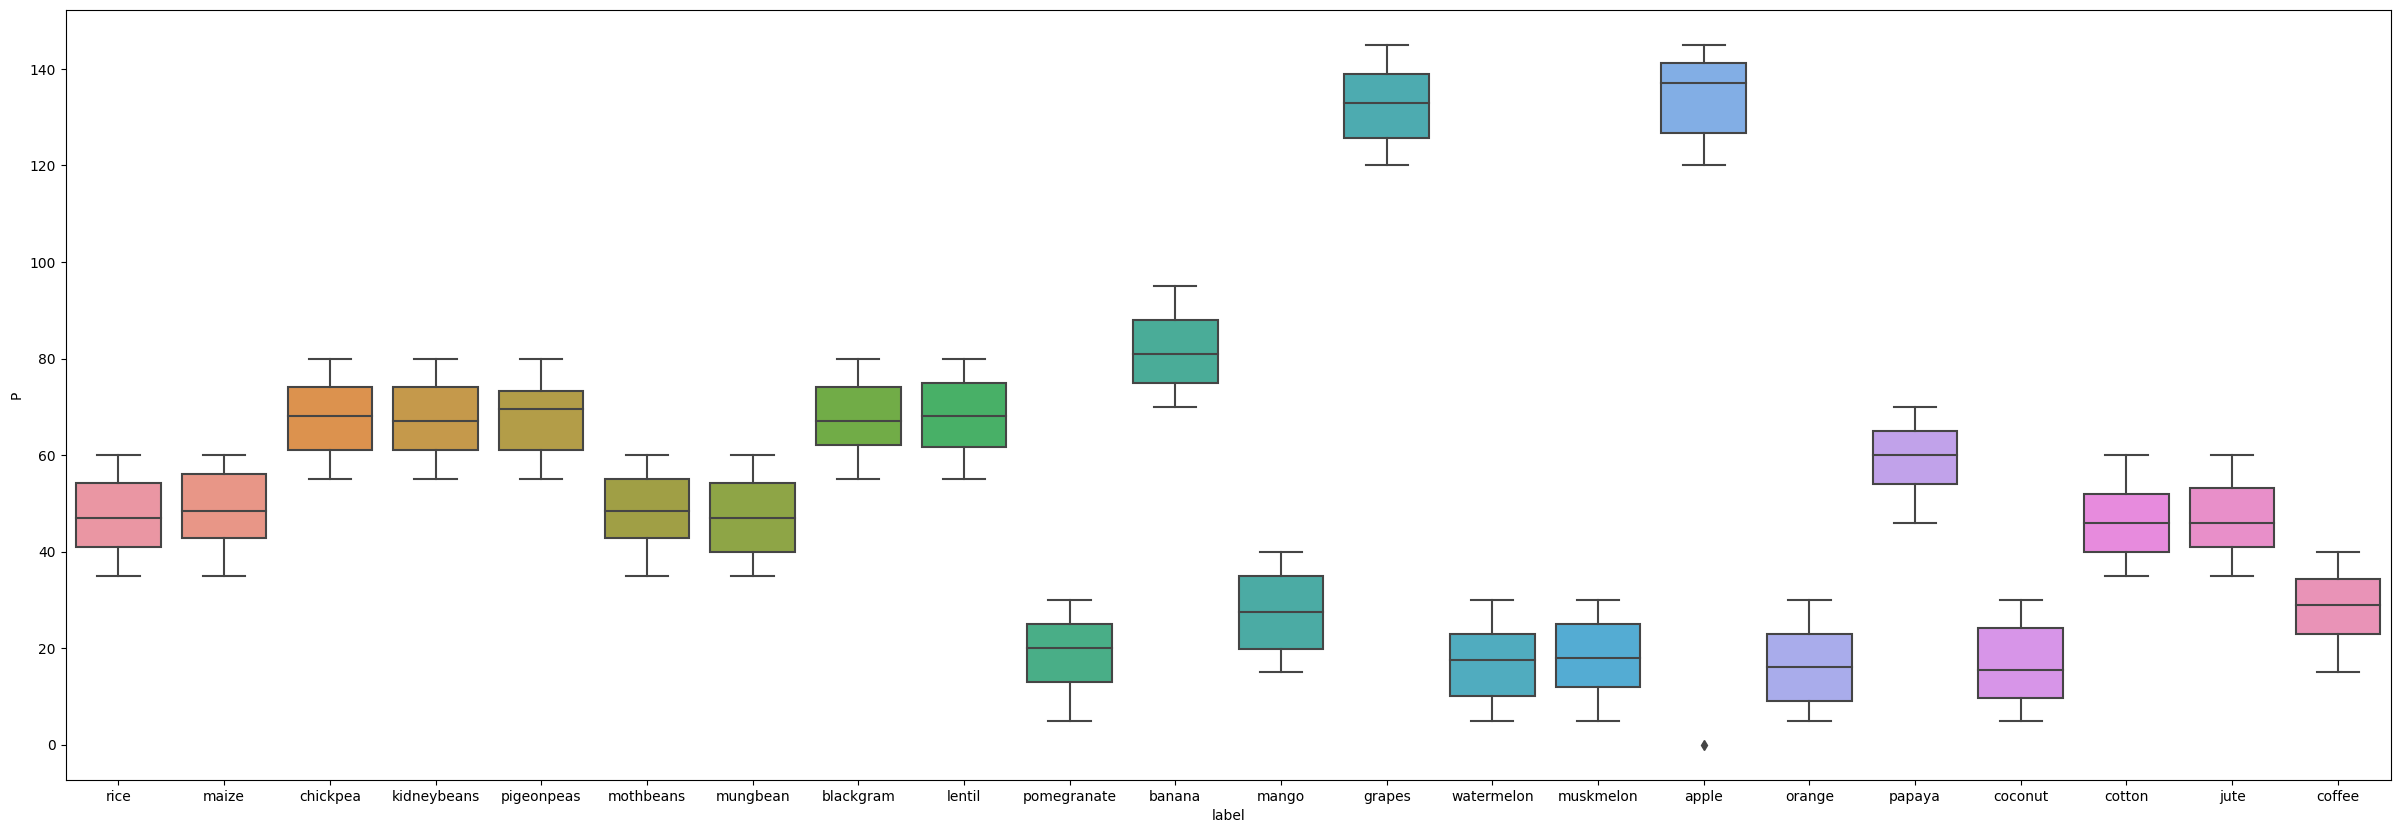

In [24]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'P')

<AxesSubplot: xlabel='label', ylabel='K'>

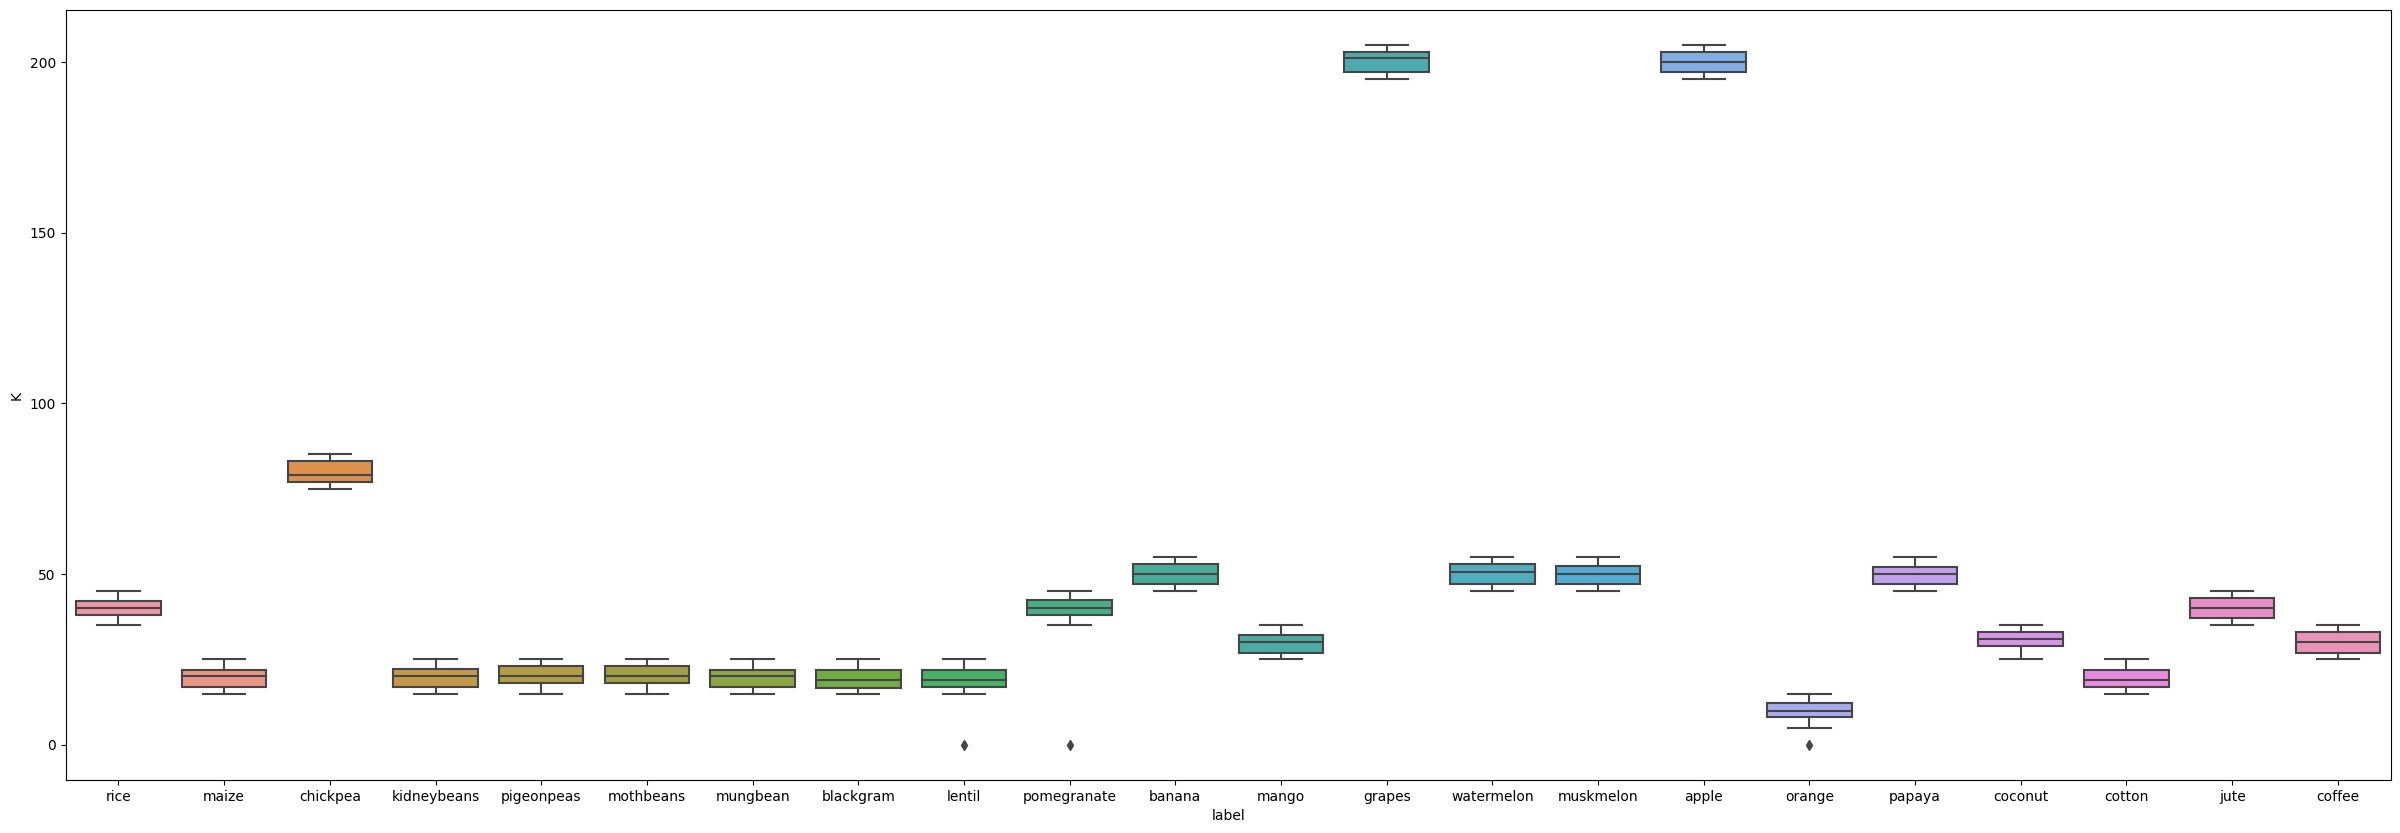

In [25]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'K')

<AxesSubplot: xlabel='label', ylabel='temperature'>

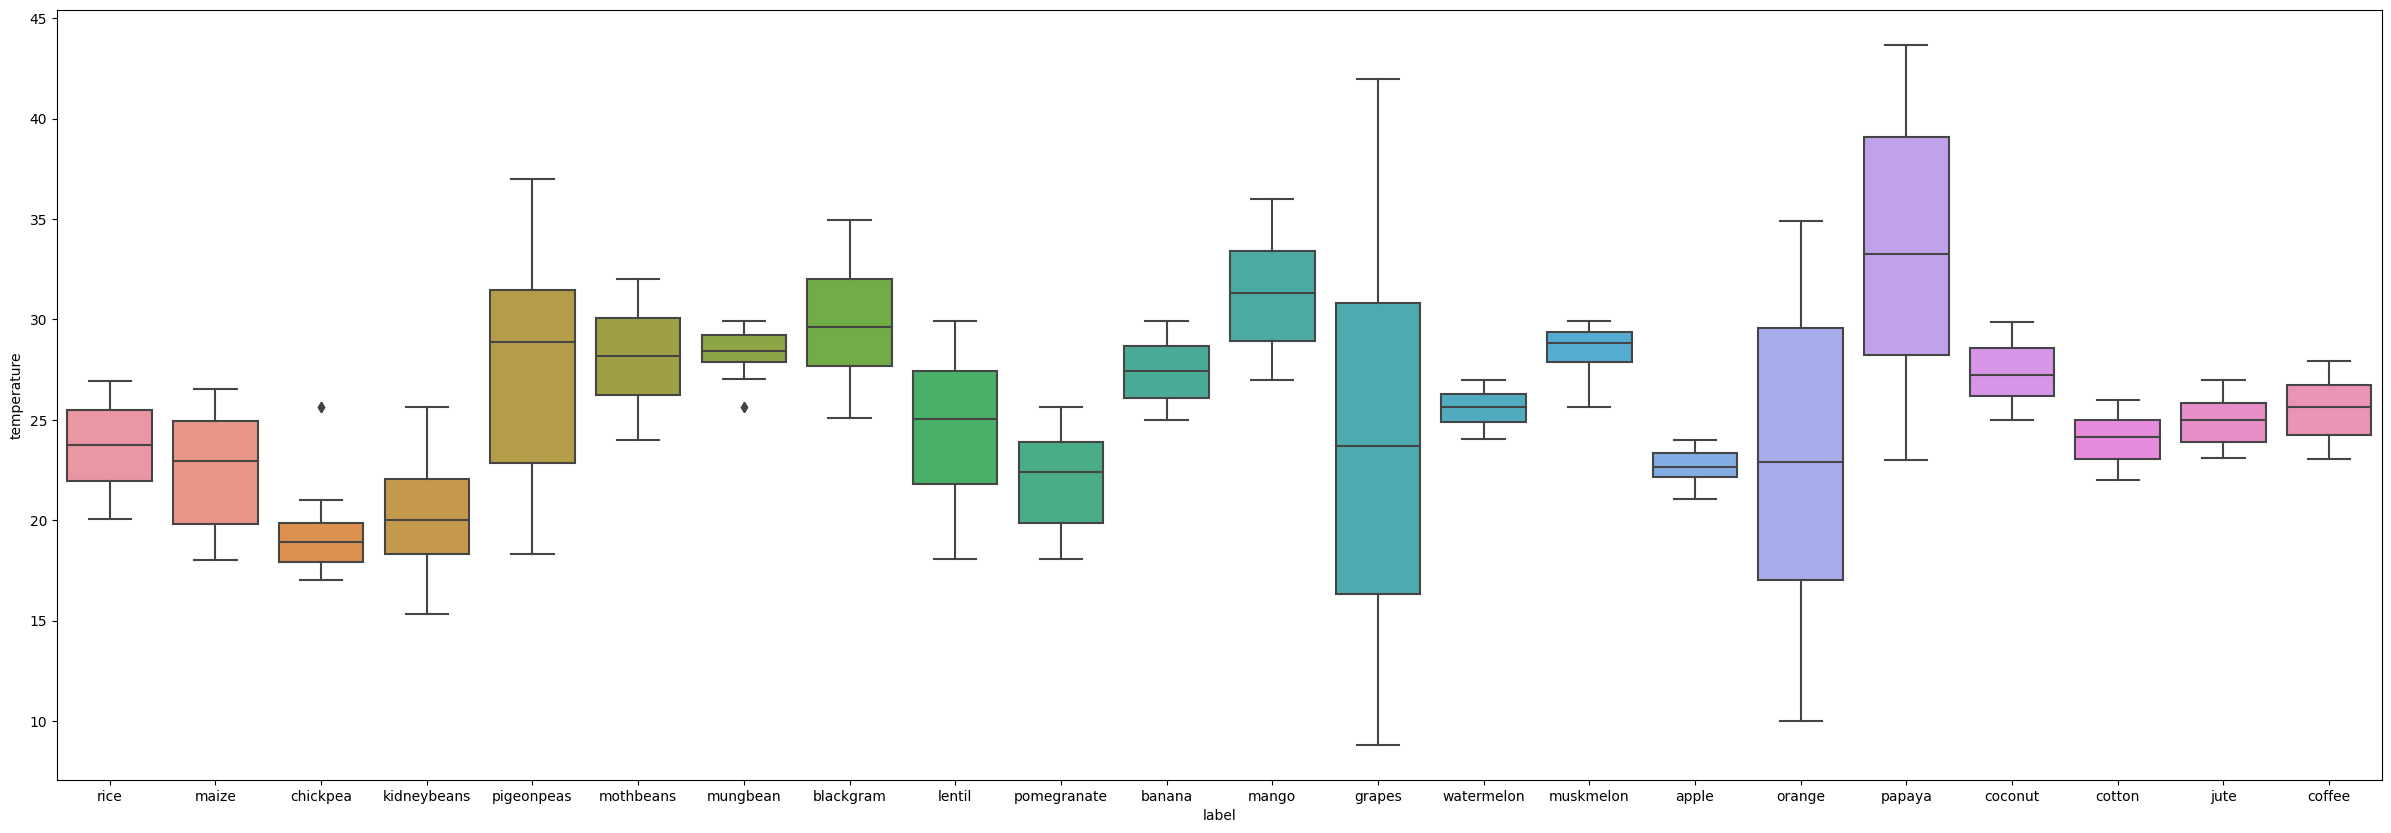

In [26]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'temperature')

<AxesSubplot: xlabel='label', ylabel='humidity'>

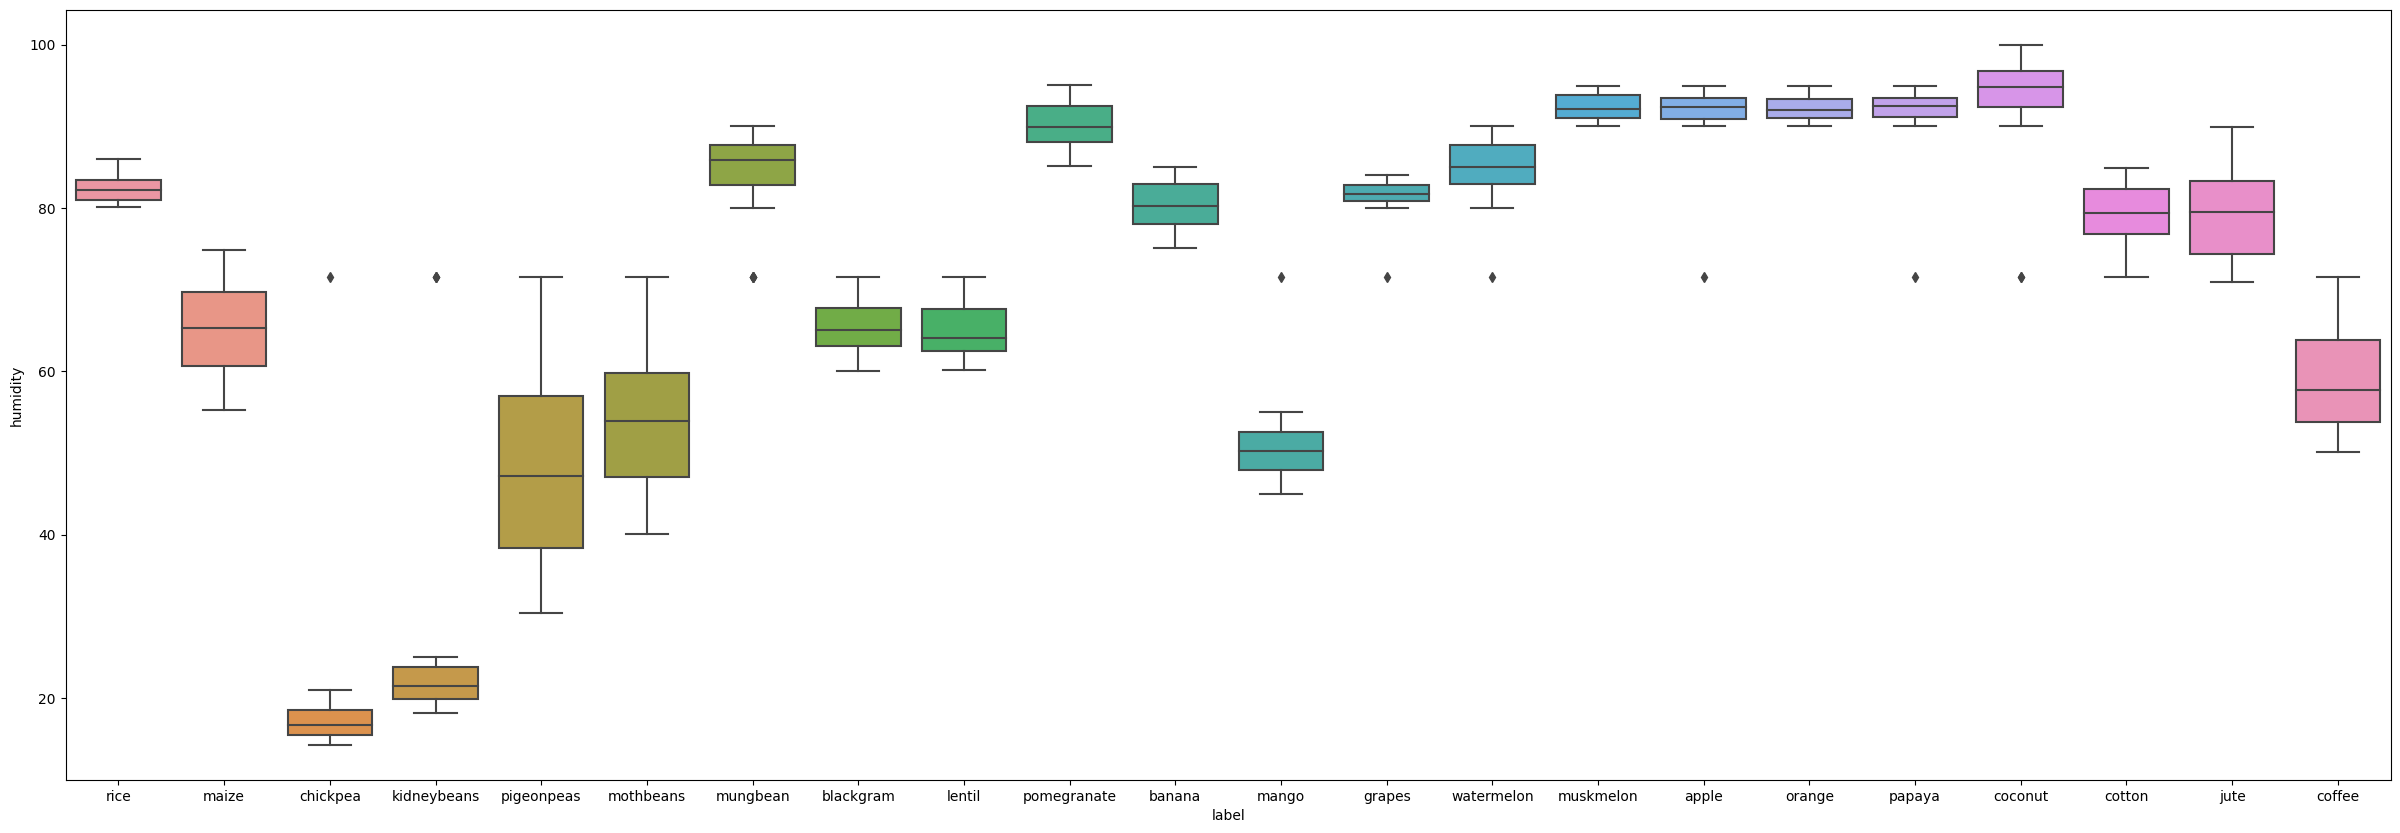

In [27]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'humidity')

<AxesSubplot: xlabel='label', ylabel='ph'>

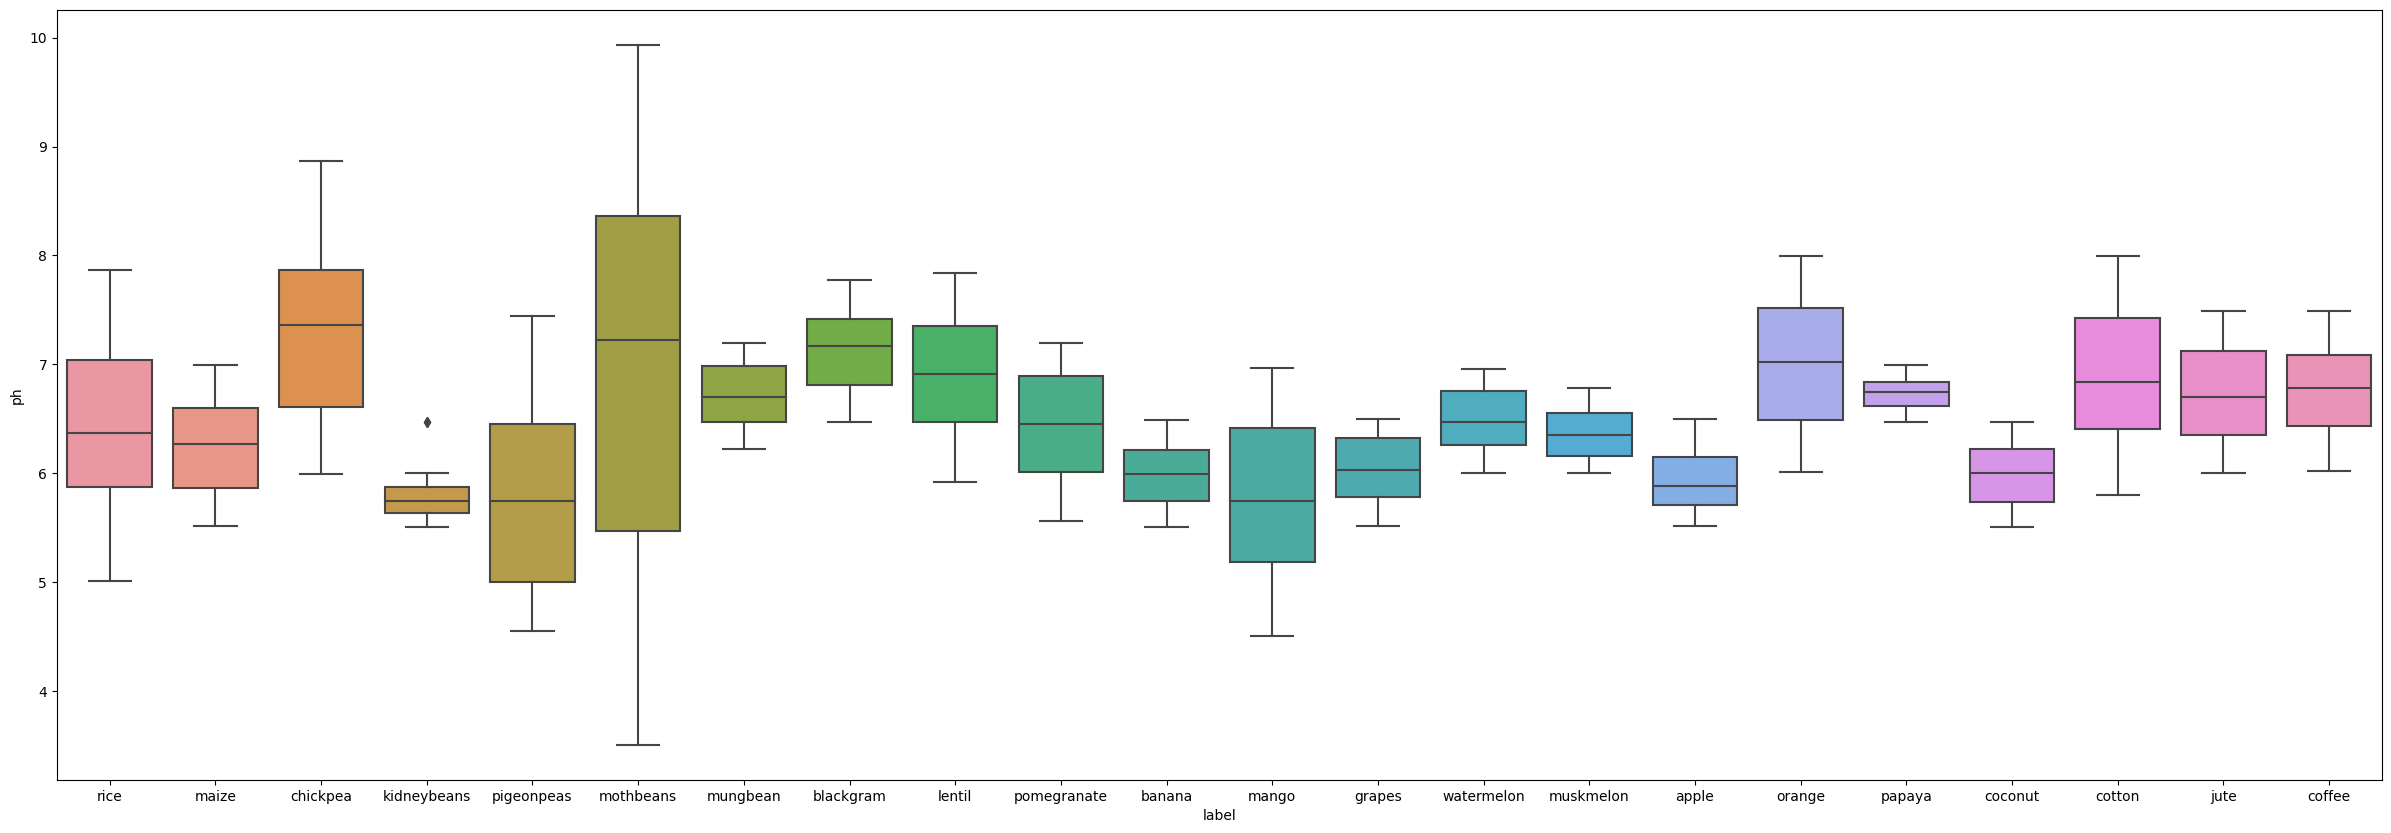

In [28]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'ph')

<AxesSubplot: xlabel='label', ylabel='rainfall'>

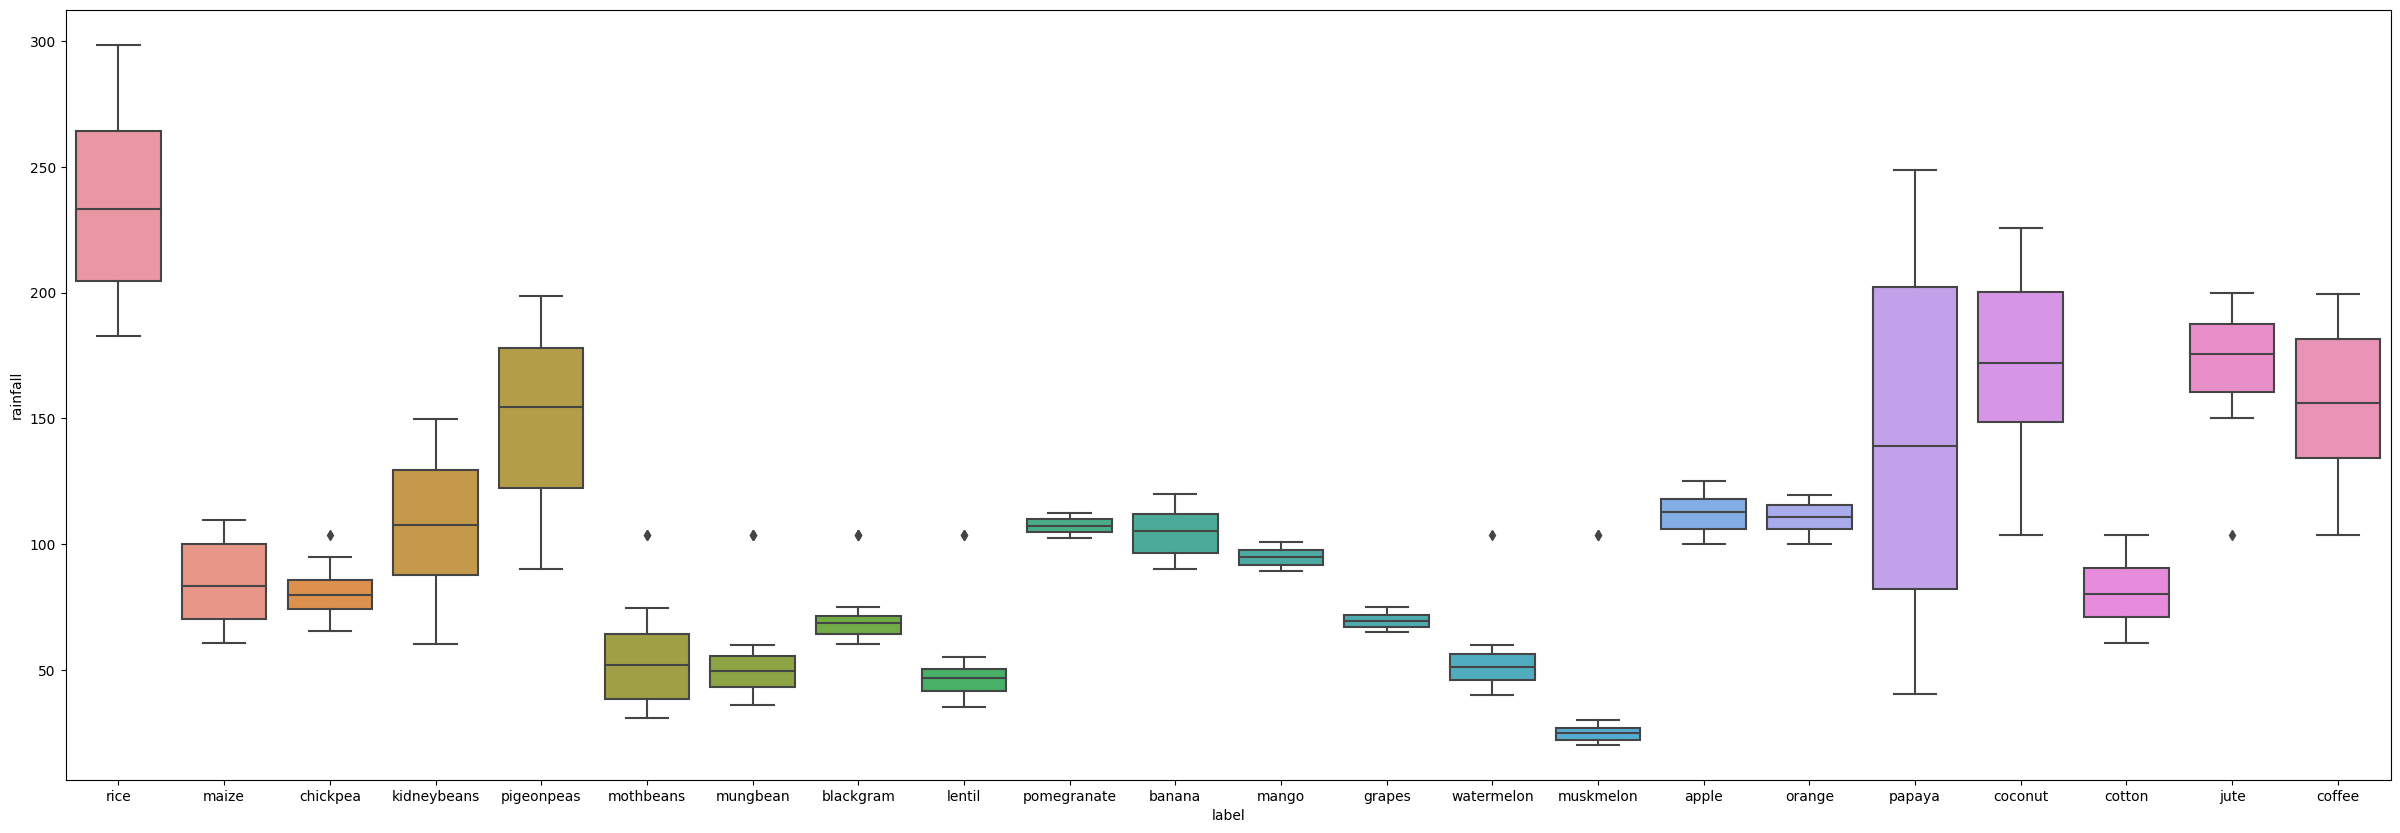

In [29]:
plt.figure(figsize = (30 , 10))
sns.boxplot(data = df , x = 'label' , y = 'rainfall')

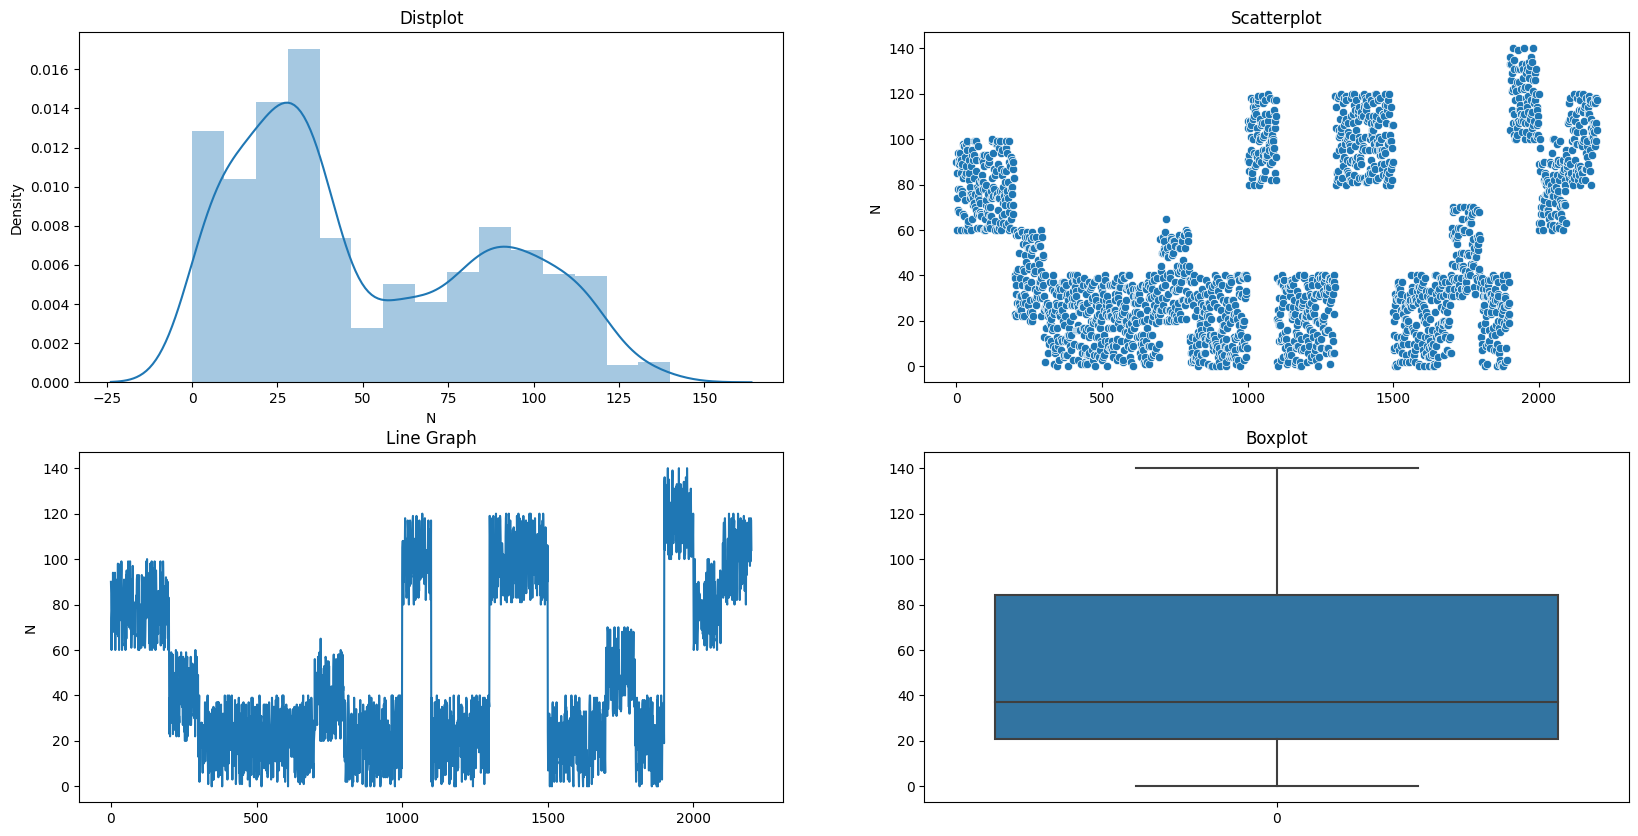

In [30]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.N)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.N )

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.N)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['N'])

plt.show()

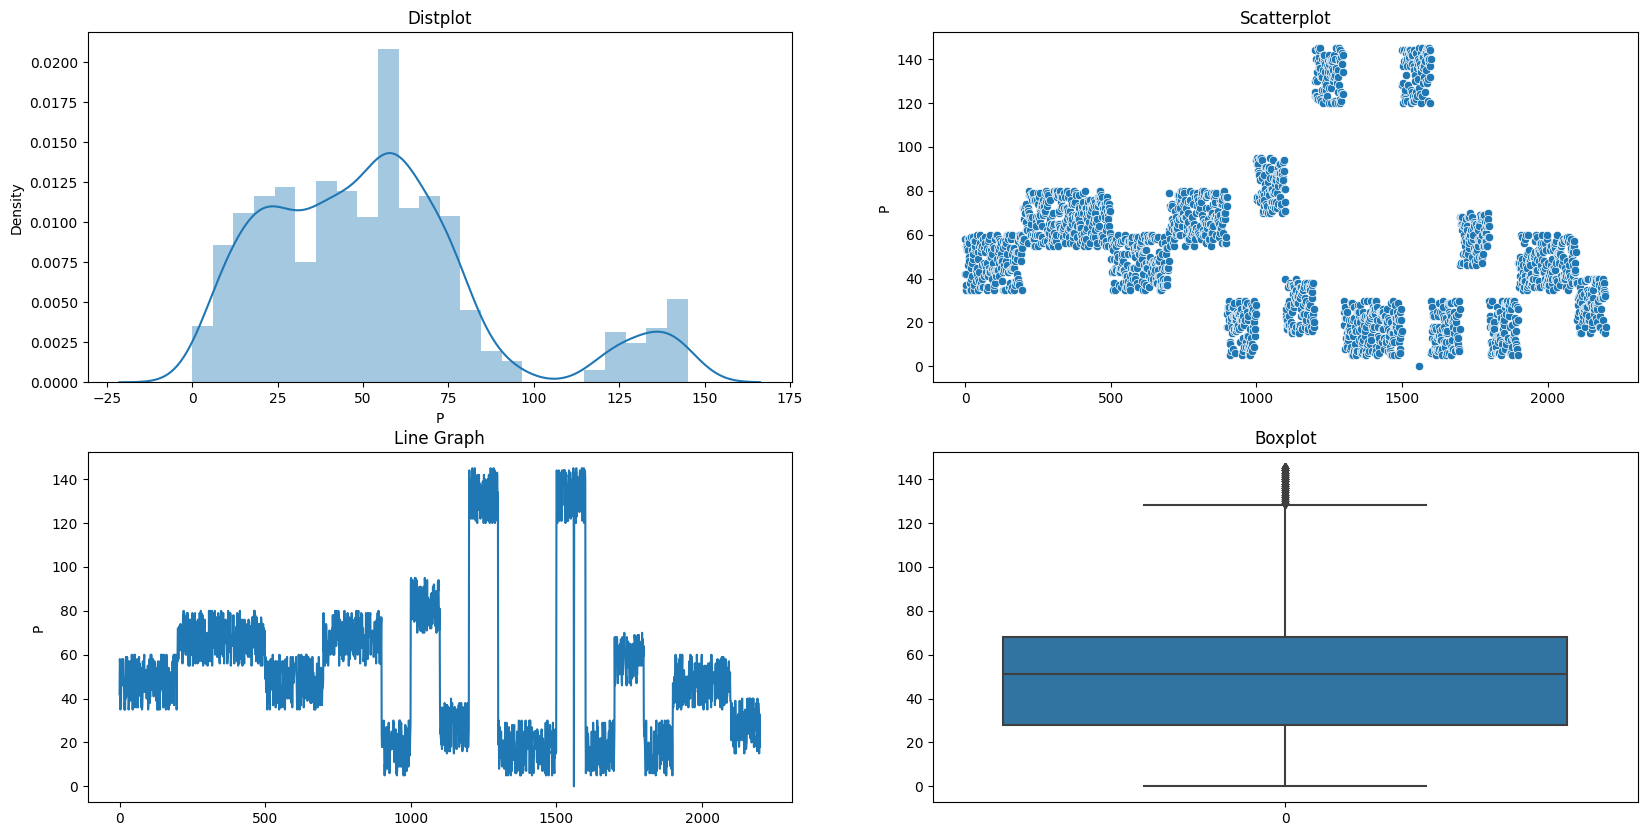

In [31]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.P)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.P)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.P)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['P'])

plt.show()

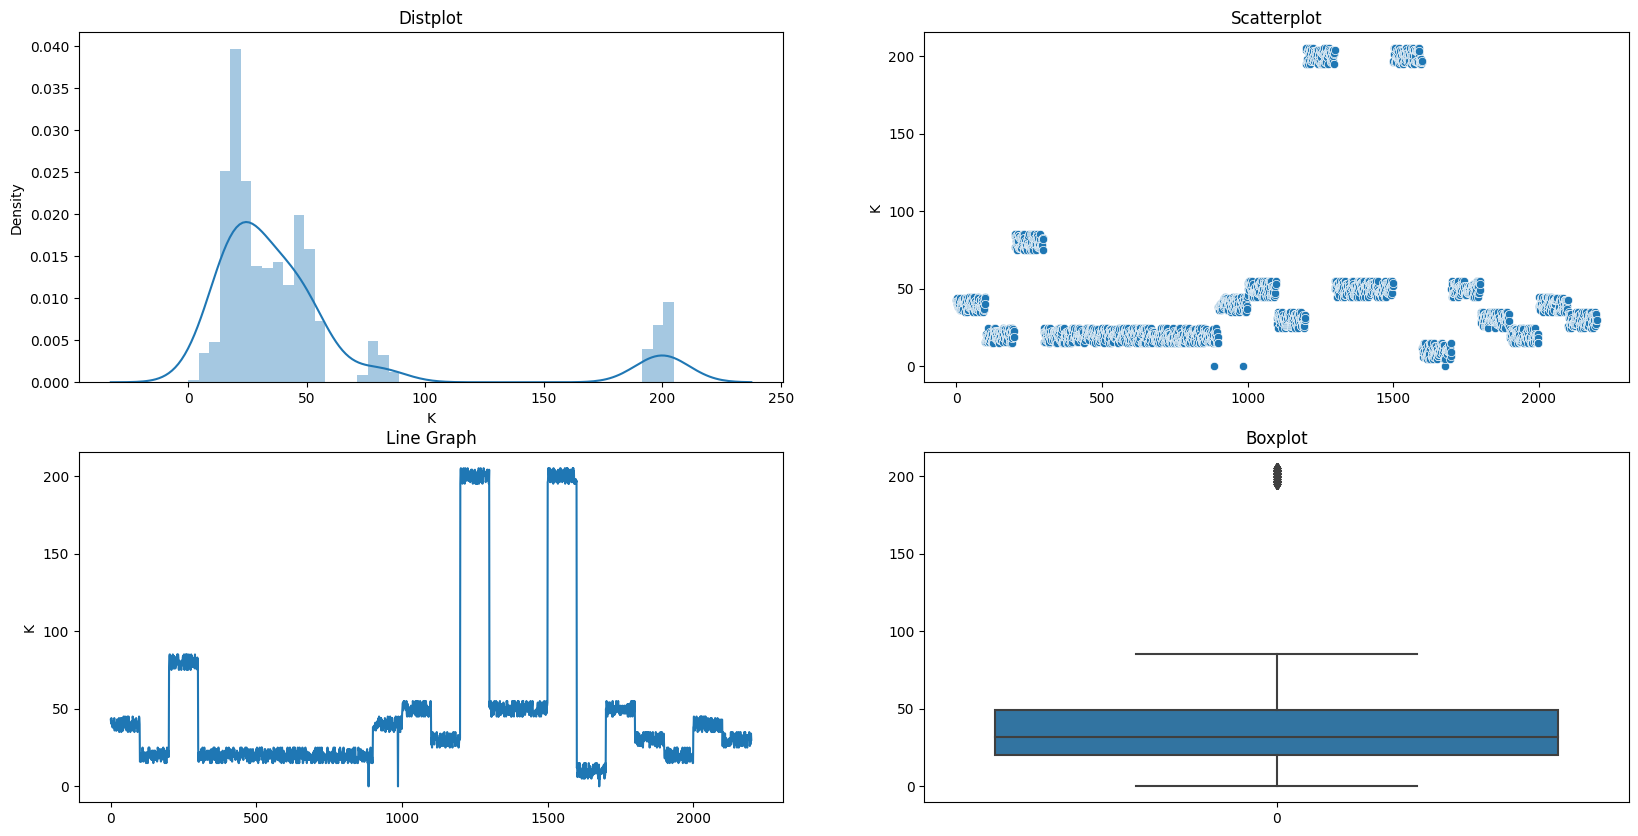

In [32]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.K)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.K)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.K)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['K'])

plt.show()

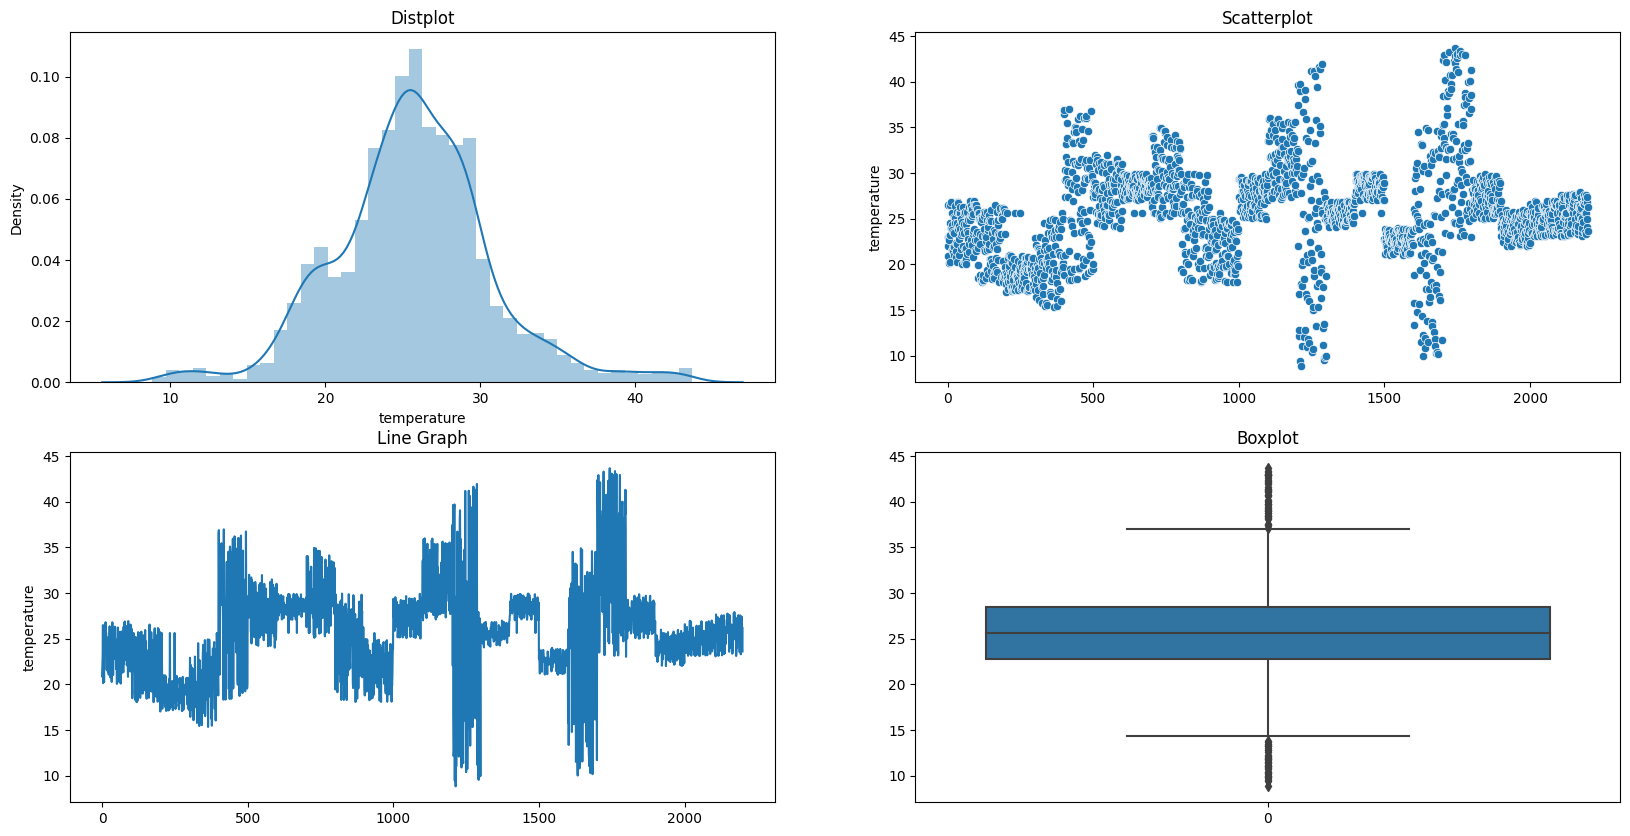

In [33]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.temperature)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.temperature)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.temperature)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['temperature'])

plt.show()

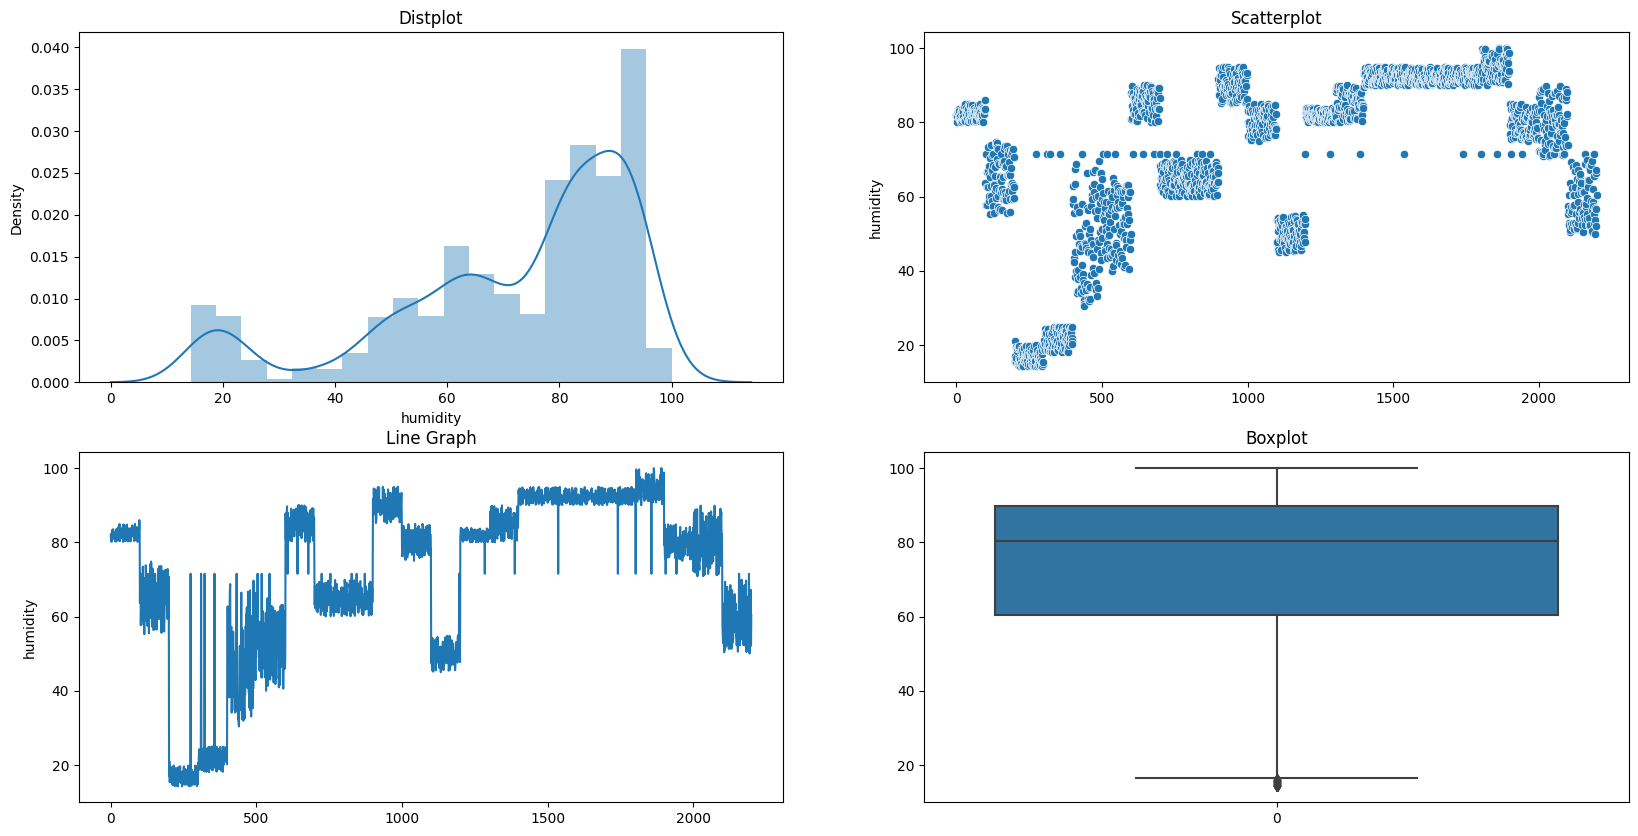

In [34]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.humidity)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.humidity)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.humidity)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['humidity'])

plt.show()

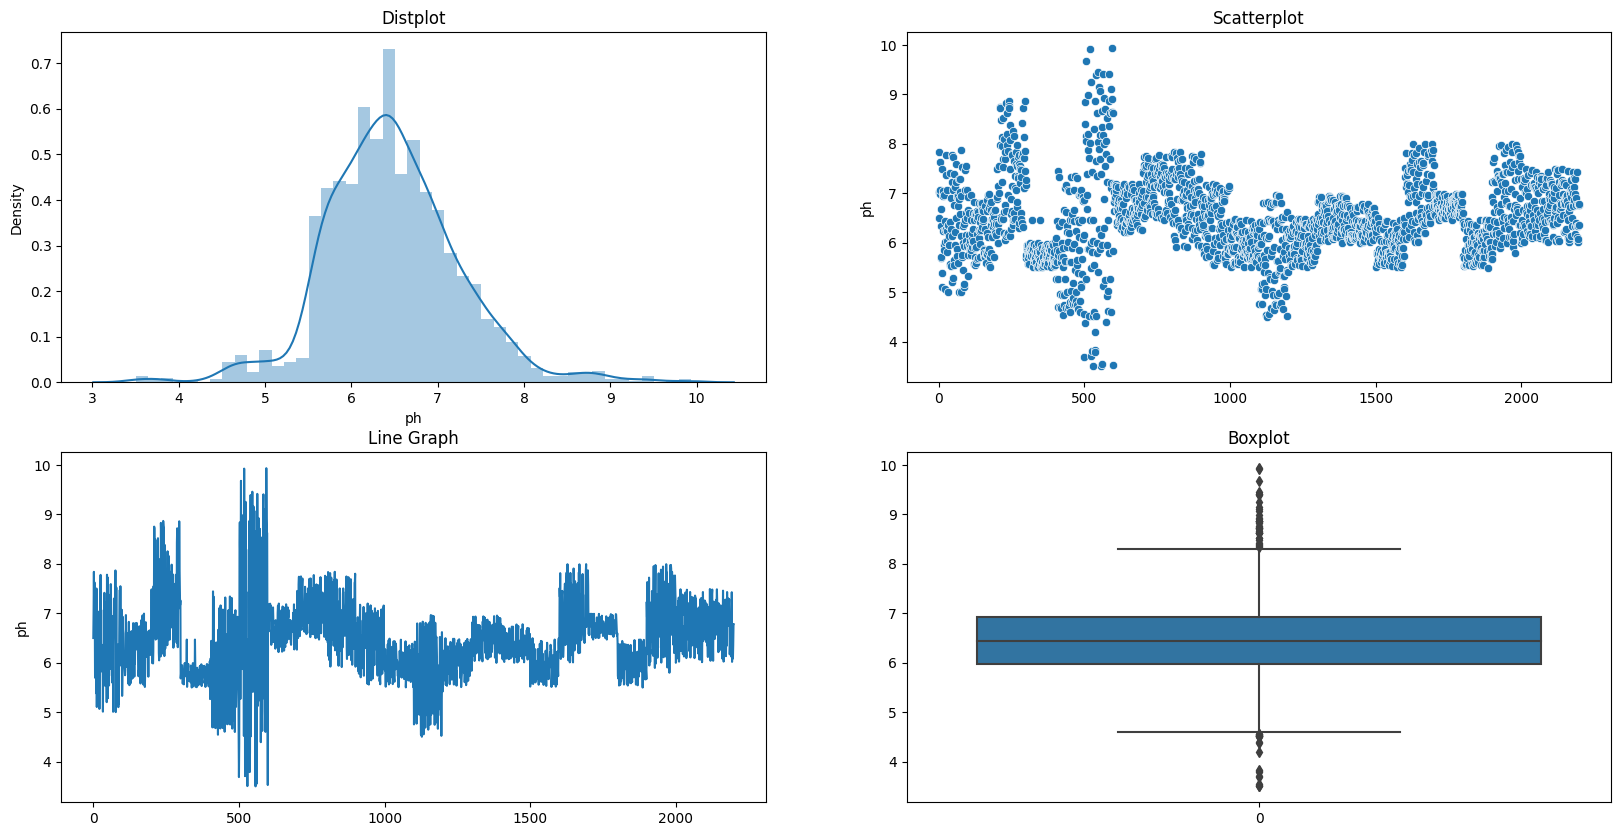

In [35]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.ph)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.ph)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.ph)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['ph'])

plt.show()

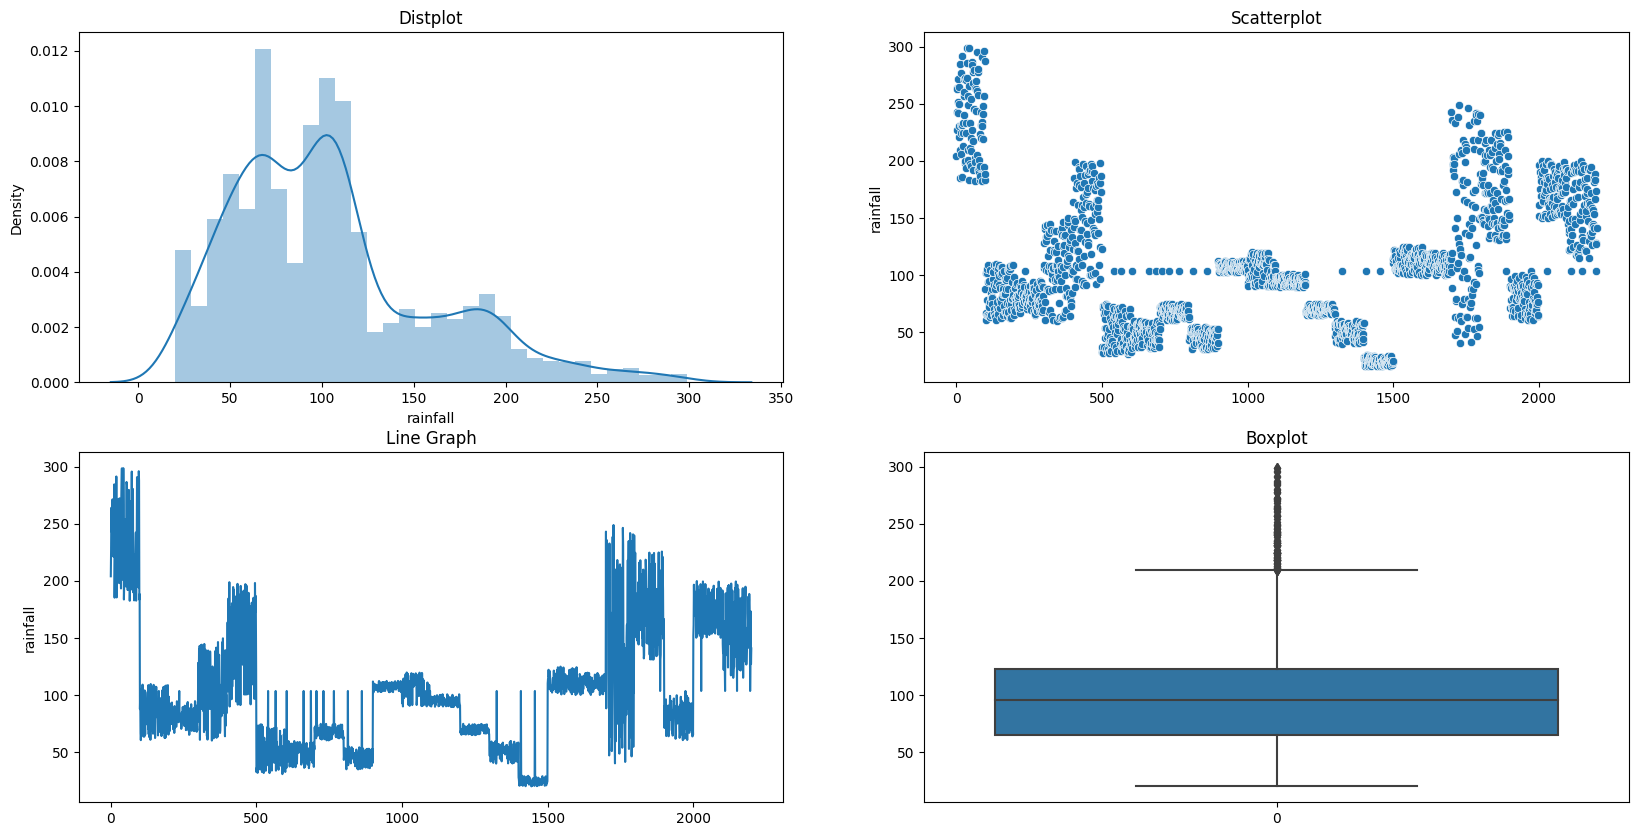

In [36]:
fig = plt.figure(figsize=(20,10))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df.rainfall)

#2
plt.subplot(2,2,2)
plt.title('Scatterplot')
sns.scatterplot(data = df,x = df.index,y = df.rainfall)

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df.rainfall)

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df['rainfall'])

plt.show()